#     RESULTS OF THE  SET OF SIMULATIONS

## Loading results

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from thermalspin.data_analysis  import *

In [3]:
# Insert here the name of the simulation set
setname = "heisenberg_2D"

In [4]:
final_state_lst, L_lst, t_lst, J_lst, D_lst, h_lst, T_lst, e_lst, m_lst, u = load_set_results(setname)

In [5]:
L, T, t_whole, J_whole, D_whole, h_whole, e_whole, m_whole, final_state = arrange_set_results_LT(L_lst, t_lst, J_lst, D_lst, h_lst, T_lst, e_lst, m_lst, final_state_lst)[:-1]
L_num = t_whole.shape[0]
T_num = t_whole.shape[1]
t_num = t_whole.shape[2]

## Global behaviour

<IPython.core.display.Javascript object>


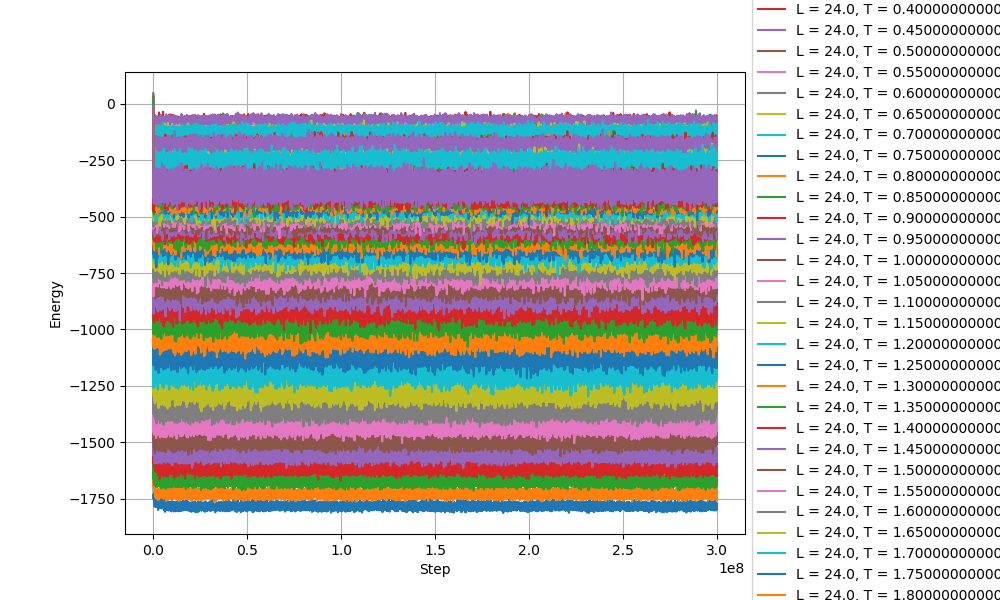

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], e_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid()
plt.show()

In [7]:
m_magnitude_whole = np.sqrt(np.sum(m_whole**2, axis = 3))

<IPython.core.display.Javascript object>


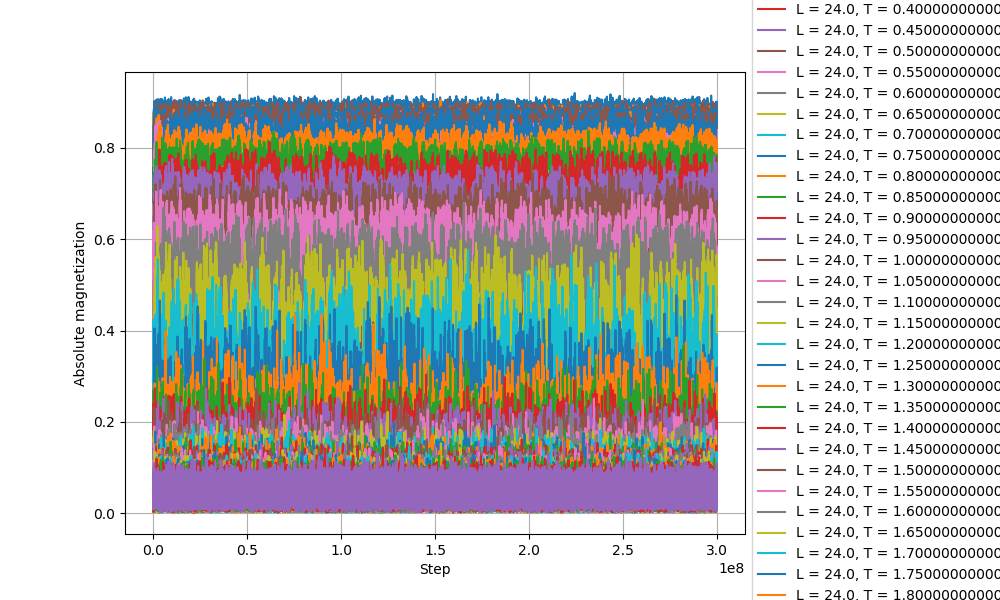

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], m_magnitude_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Absolute magnetization")
plt.grid()
plt.show()

## Single ensemble analysis

In [9]:
# Insert here index of the ensemble to be analyzed 
L_idx = -1
T_idx = -1

<IPython.core.display.Javascript object>


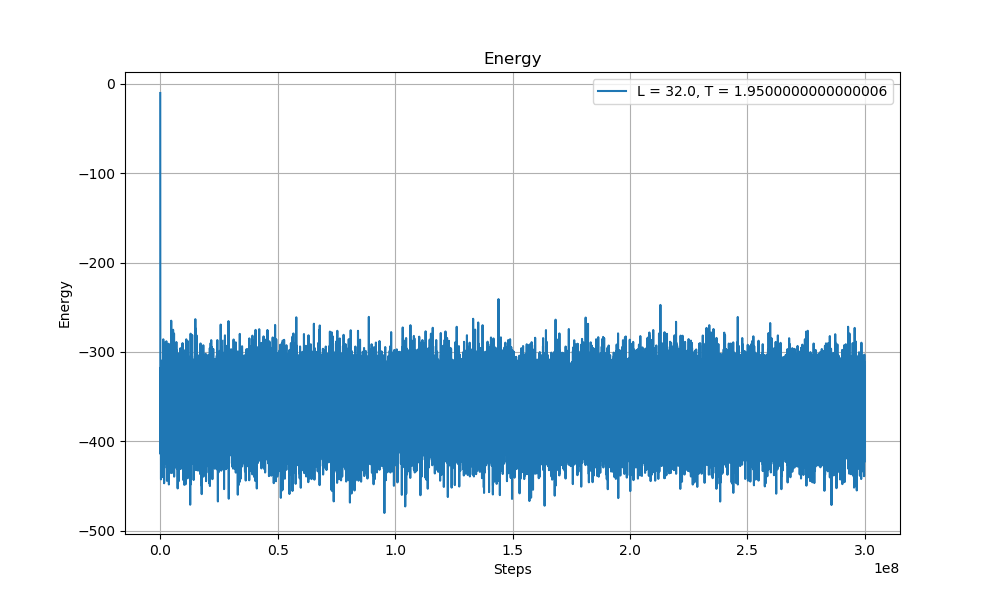

In [10]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], e_whole[L_idx, T_idx], label=f"L = {L[L_idx]}, T = {T[T_idx]}")
ax.legend()
plt.ylabel("Energy")
plt.xlabel("Steps")
plt.title("Energy")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


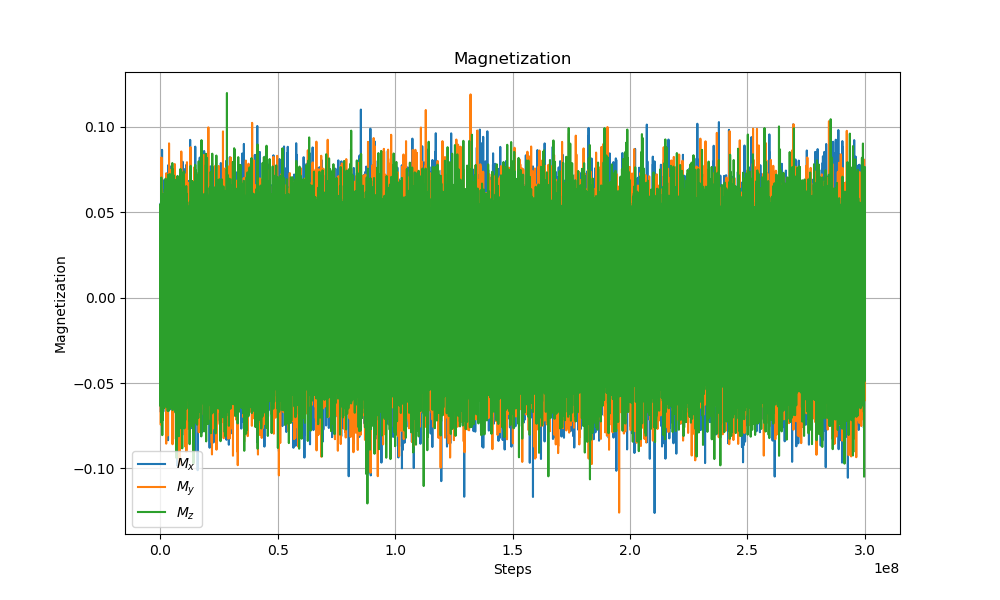

In [11]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 0], label = r"$M_x$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 1], label = r"$M_y$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 2], label = r"$M_z$")
plt.legend()
plt.ylabel("Magnetization")
plt.xlabel("Steps")
plt.title("Magnetization")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


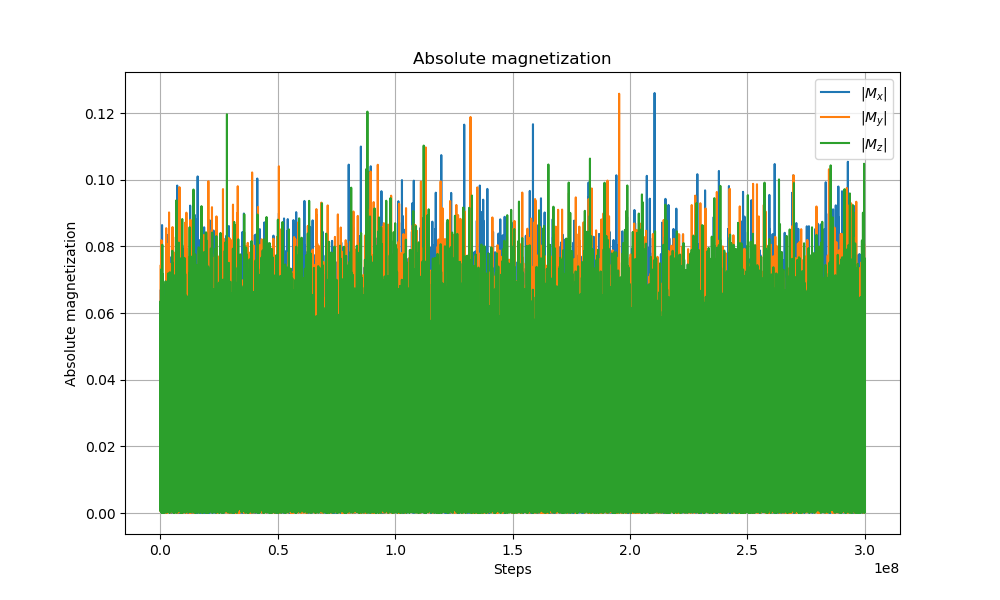

In [12]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 0]), label = r"$|M_x|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 1]), label = r"$|M_y|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 2]), label = r"$|M_z|$")
plt.legend()
plt.ylabel("Absolute magnetization")
plt.xlabel("Steps")
plt.title("Absolute magnetization")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


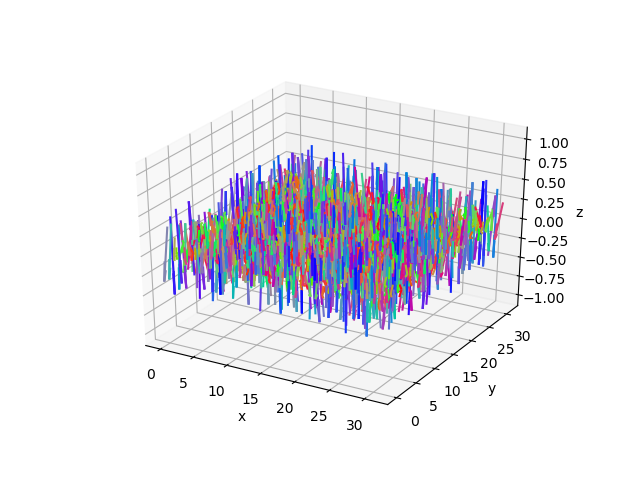

In [13]:
fig = plot_state_2D(final_state[L_idx][T_idx])
fig.show()

<IPython.core.display.Javascript object>


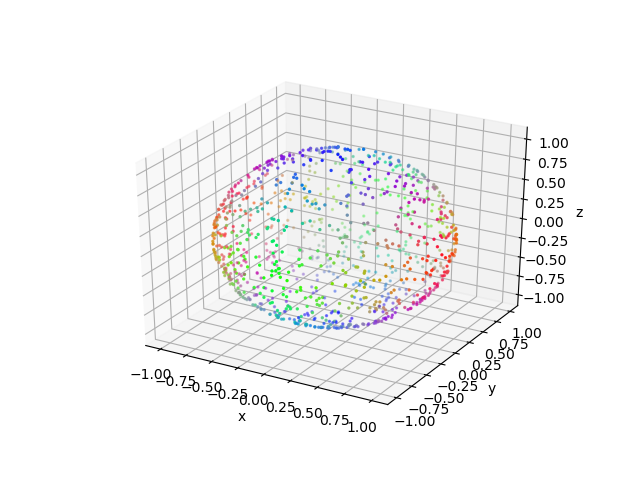

In [14]:
fig = plot_spin_directions(final_state[L_idx][T_idx])
fig.show()

## System results

In [15]:
# SELECT WARMUP PERIOD TO LAST UNTIL STEP NUMBER warmup_final_step
warmup_final_step = 0.1e7
warmup_final_idx = np.argmax(np.equal(t_whole[0,0], warmup_final_step))
t = t_whole[:, :, warmup_final_idx:]
e = e_whole[:, :, warmup_final_idx:]
m = m_whole[:, :, warmup_final_idx:]

In [16]:
e_mean = np.mean(e, axis=2)
e_rmsd = np.sqrt(np.var(e, axis=2))

<IPython.core.display.Javascript object>


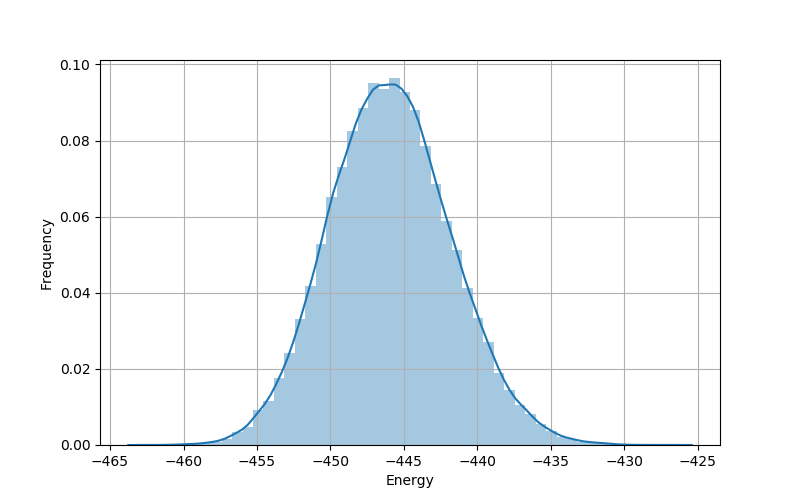

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(e[0,0])
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [18]:
m_mean = np.mean(m, axis=2)
m_rmsd = np.sqrt(np.var(m, axis=2))
m_magnitude = np.sqrt(np.sum(m**2, axis = 3))
m_magnitude_mean = np.mean(m_magnitude, axis=2)
m_magnitude_rmsd = np.sqrt(np.var(m_magnitude, axis=2))

### Mean energy

<IPython.core.display.Javascript object>


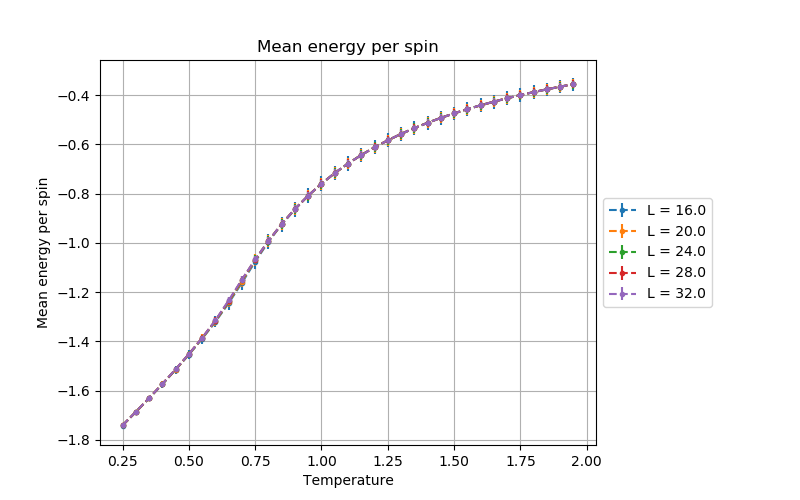

In [19]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, e_mean[i]/L[i]**2, yerr=e_rmsd[i]/2/L[i]**2, fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel("Mean energy per spin")
plt.title("Mean energy per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_energy.svg")

### Mean magnetization magnitude

<IPython.core.display.Javascript object>


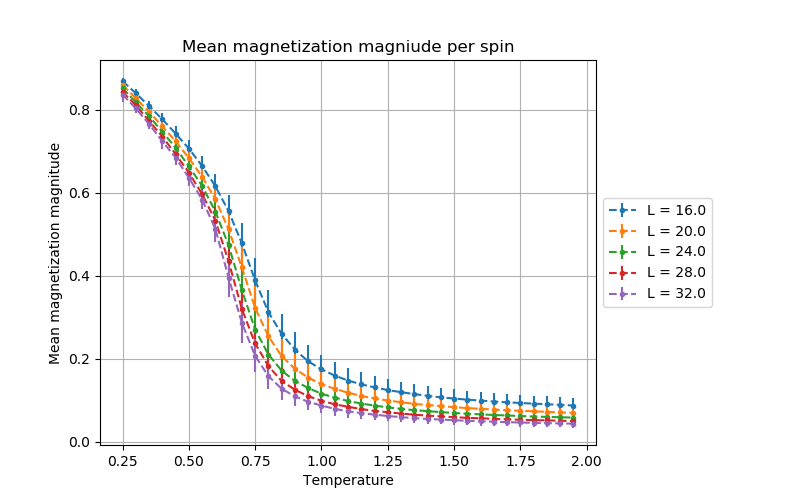

In [20]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, m_magnitude_mean[i], yerr=m_magnitude_rmsd[i]/2,fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel("Mean magnetization magnitude")
plt.title("Mean magnetization magniude per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_magnetization_magnitude.svg")

### Heat capacity

In [21]:
e_var = np.var(e, axis=2)

In [22]:
cv = np.zeros(shape=(L_num, T_num))
for i in np.ndindex(L_num):
    cv[i] = e_var[i]/T**2/L[i]**2

<IPython.core.display.Javascript object>


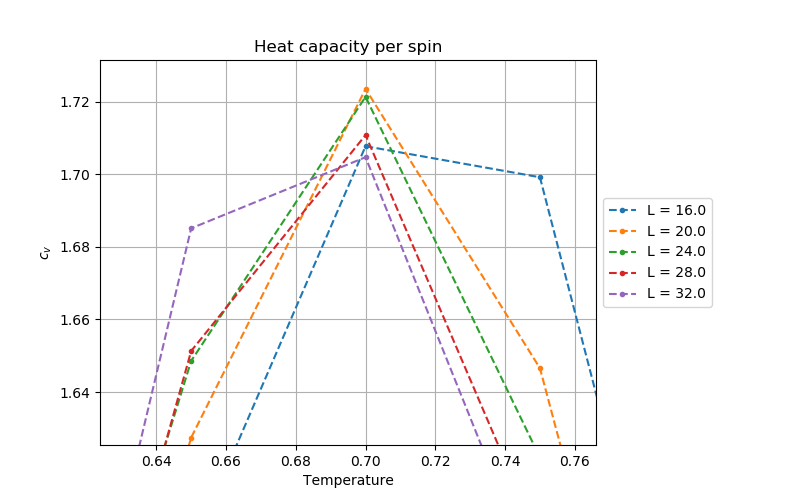

In [23]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, cv[i], "--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$c_v$")
plt.title("Heat capacity per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_heat_capacity.svg")

### Suscpetibility

In [24]:
def cov(M,i,j):
    M_mean = np.mean(M, axis=2)
    ret = np.zeros(shape=(L_num, T_num))
    for l,t in np.ndindex(L_num, T_num):
        ret[l,t] = np.mean((M[l,t,:,i]-M_mean[l,t,i])*(M[l,t,:,j]-M_mean[l,t,j]))
    return ret

In [25]:
chi_xx = np.zeros(shape=(L_num, T_num))
chi_yy = np.zeros(shape=(L_num, T_num))
chi_zz = np.zeros(shape=(L_num, T_num))
chi_xy = np.zeros(shape=(L_num, T_num))
chi_yz = np.zeros(shape=(L_num, T_num))
chi_zx = np.zeros(shape=(L_num, T_num))

for i in np.ndindex(L_num):
    chi_xx[i] = cov(m,0,0)[i]/T/L[i]**2
    chi_yy[i] = cov(m,1,1)[i]/T/L[i]**2
    chi_zz[i] = cov(m,2,2)[i]/T/L[i]**2
    chi_xy[i] = cov(m,0,1)[i]/T/L[i]**2
    chi_yz[i] = cov(m,1,2)[i]/T/L[i]**2
    chi_zx[i] = cov(m,2,0)[i]/T/L[i]**2

<IPython.core.display.Javascript object>


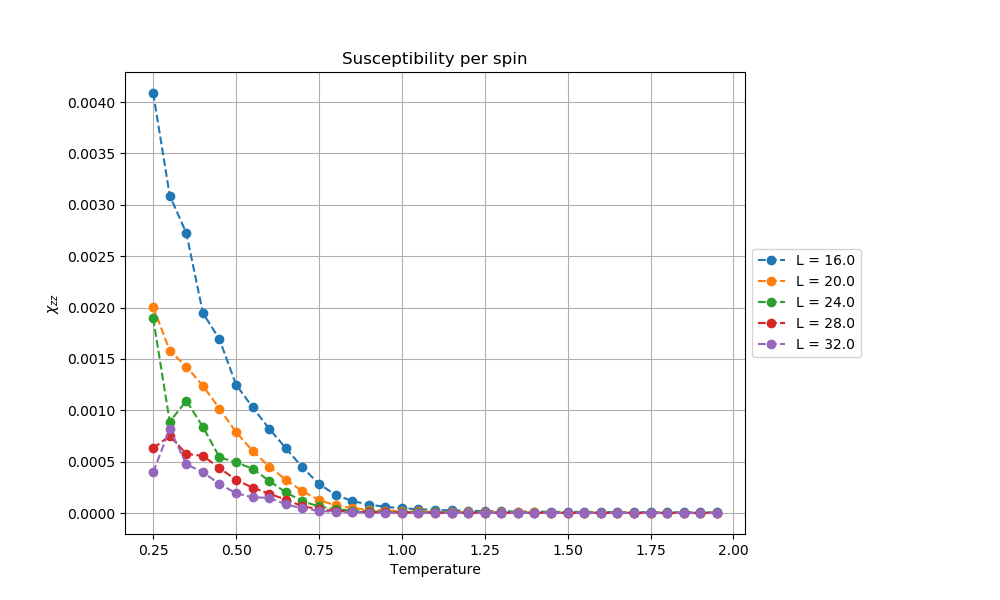

In [26]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, chi_zz[i], "o--", label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title("Susceptibility per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_susceptibility.svg")

<IPython.core.display.Javascript object>


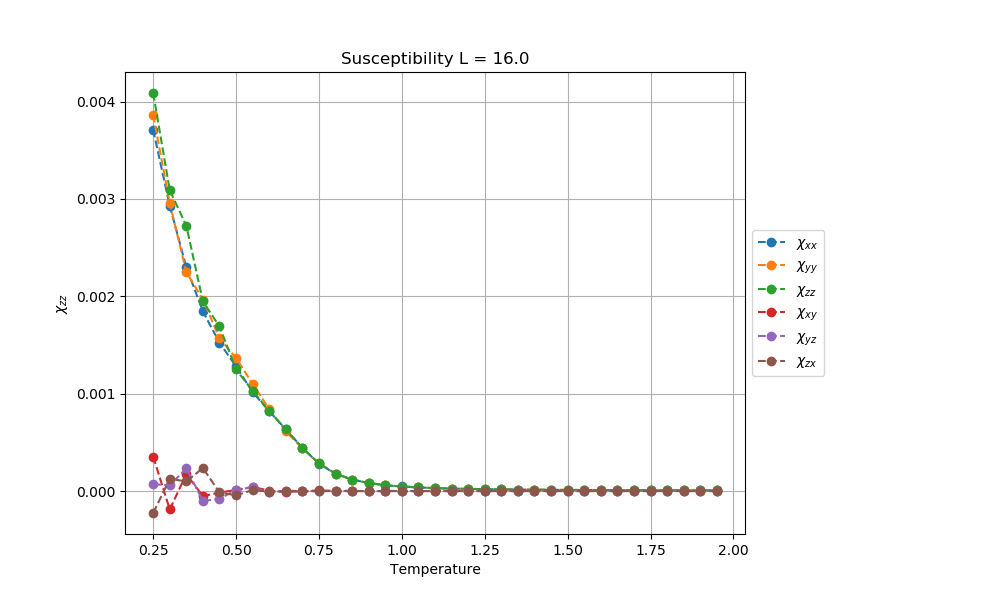

In [27]:
L_idx = 0

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(T, chi_xx[L_idx], "o--", label=r"$\chi_{xx}$")
ax.plot(T, chi_yy[L_idx], "o--", label=r"$\chi_{yy}$")
ax.plot(T, chi_zz[L_idx], "o--", label=r"$\chi_{zz}$")
ax.plot(T, chi_xy[L_idx], "o--", label=r"$\chi_{xy}$")
ax.plot(T, chi_yz[L_idx], "o--", label=r"$\chi_{yz}$")
ax.plot(T, chi_zx[L_idx], "o--", label=r"$\chi_{zx}$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title(f"Susceptibility L = {L[L_idx]}")
plt.grid()
plt.show()

### Binder ratio

In [28]:
binder = 1 - (1/3)*np.mean(m_magnitude**4, axis=2)/(np.mean(m_magnitude**2, axis=2)**2)

<IPython.core.display.Javascript object>


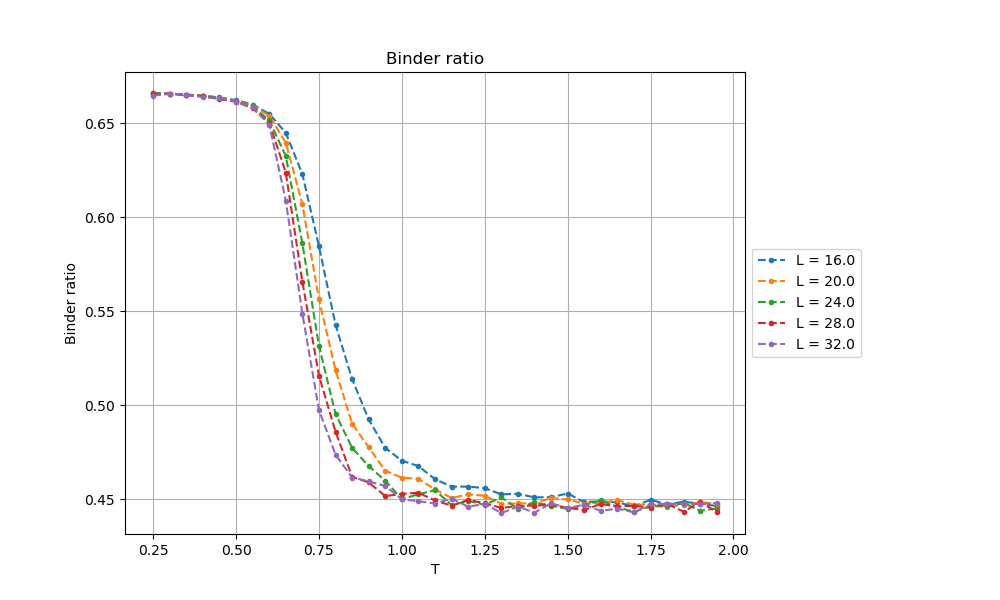

In [29]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, binder[i], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.grid()
plt.show()
fig.savefig("plots/"+setname+"_binder.svg")

<IPython.core.display.Javascript object>


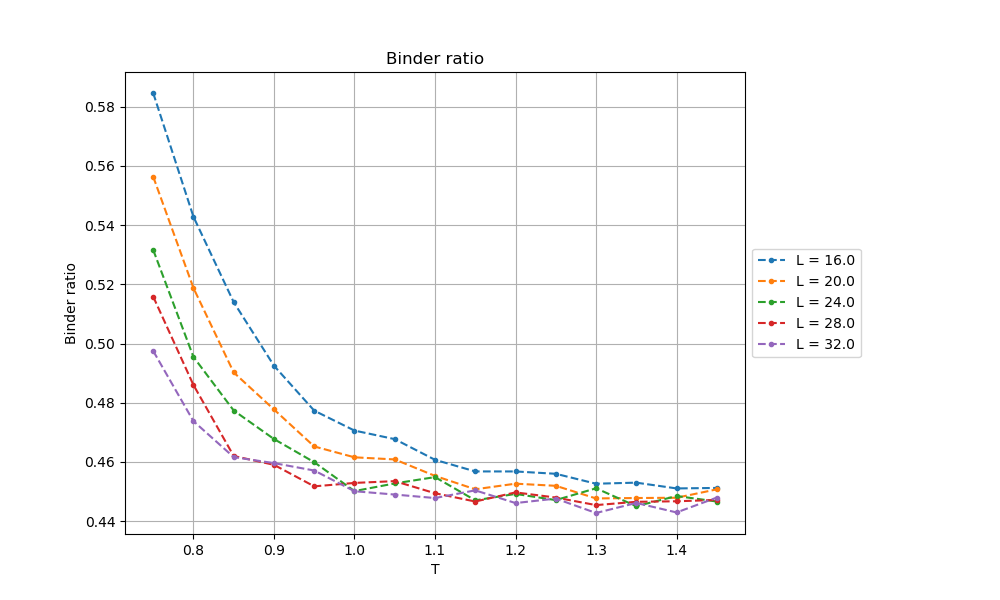

In [30]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T[10:-10], binder[i][10:-10], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.grid()
plt.show()
fig.savefig("plots/"+setname+"_binder_zoomed.svg")